## PRÁCTICA 2: Análisis básico de sentimiento de tweets

El objetivo de esta sección es realizar un análisis de sentimiento básico de los tweets de los usuarios considerados en la sección anterior utilizando VADER.

**Se importan las librerías necesarias**

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

**Lectura de tweets**

In [3]:
britneyspears=pd.read_csv('tweets_britneyspears.csv', parse_dates=['date'])
neiltyson=pd.read_csv('tweets_neiltyson.csv', parse_dates=['date'])
RussWest=pd.read_csv('tweets_russwest44.csv', parse_dates=['date'])
JamesHarden=pd.read_csv('tweets_JHarden13.csv', parse_dates=['date'])

**Aplicación de VADER**

Con VADER, se le asigna a cada tweet un score *positivo*, uno *negativo* y uno *neutral*, y combinándolos se obtiene un *compound* score. 
En resumen, se obtiene que un:
    
- sentimiento **positivo** tiene un compound score **>= 0.05**

- sentimiento **neutral** tiene un compound score **> -0.05 y < 0.05**

- sentimiento **negativo** tiene un compound score **<= -0.05**

In [11]:
analyzer = SentimentIntensityAnalyzer()

In [20]:
britney_results =[]
for i, row in britneyspears.iterrows():
    vs = analyzer.polarity_scores(row['text'])
    britney_results.append(vs)
    
neiltyson_results =[]
for i, row in neiltyson.iterrows():
    vs = analyzer.polarity_scores(row['text'])
    neiltyson_results.append(vs)
    
RussWest_results =[]
for i, row in RussWest.iterrows():
    vs = analyzer.polarity_scores(row['text'])
    RussWest_results.append(vs)
    
JamesHarden_results =[]
for i, row in JamesHarden.iterrows():
    vs = analyzer.polarity_scores(row['text'])
    JamesHarden_results.append(vs)
    
britney_compound_score=[]
for item in britney_results:
    britney_compound_score.append(item['compound'])
    
neiltyson_compound_score=[]
for item in neiltyson_results:
    neiltyson_compound_score.append(item['compound'])
    
RussWest_compound_score=[]
for item in RussWest_results:
    RussWest_compound_score.append(item['compound'])
    
JamesHarden_compound_score=[]
for item in JamesHarden_results:
    JamesHarden_compound_score.append(item['compound'])

**Gráfico de la distribución de los scores**

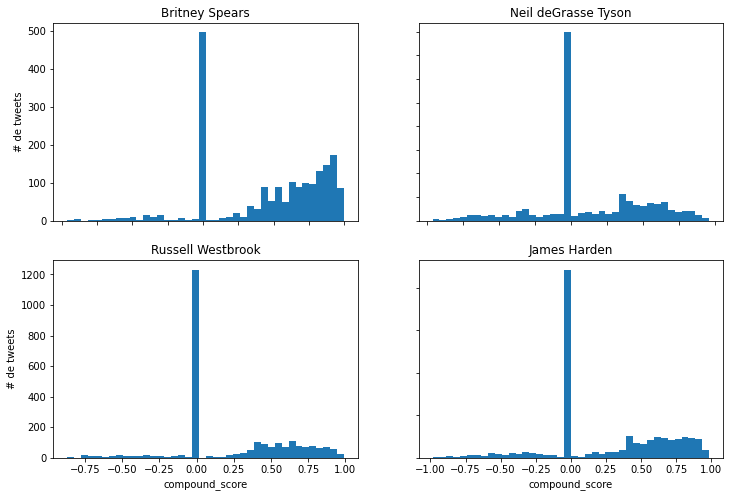

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs[0, 0].hist(britney_compound_score, bins=40)
axs[0, 0].set_title('Britney Spears')
axs[0, 1].hist(neiltyson_compound_score, bins=40)
axs[0, 1].set_title('Neil deGrasse Tyson')
axs[1, 0].hist(RussWest_compound_score, bins=40)
axs[1, 0].set_title('Russell Westbrook')
axs[1, 1].hist(JamesHarden_compound_score, bins=40)
axs[1, 1].set_title('James Harden')

for ax in axs.flat:
    ax.set(xlabel='compound_score', ylabel='# de tweets')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.show()

**Observaciones**

- En la distribución de los compound scores se observa un pico de tweets alrededor del valor 0, lo que indicaría que la mayoría de los tweets son calificados como neutrales. 

- En ninguno de los usuarios la cantidad de tweets catalogados como negativos es representativa.

- Se observa un patrón similar en la distribución de los tweets de Russell Westbrook, James Harden y Neil deGrasse Tyson.

- Britney Spears es la que mayor proporción de tweets positivos tiene.